In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium



In [2]:
df_comp = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/tmph4izx_fb.csv')
df_comp.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004125189,2022-01-13 12:59:00,2022-01-20 12:59:39,NaN,OVERDUE,Open,,Illegal Rooming House,Inspectional Services,Building,...,C11,Dorchester,8,Ward 17,1706,27 Lithgow St,2124.0,42.2896,-71.0701,Constituent Call
1,101004161747,2022-02-02 11:42:49,2022-02-16 11:42:49,2022-02-02 11:45:47,ONTIME,Closed,Case Closed Case Noted,PublicWorks: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
2,101004149944,2022-01-28 19:36:00,NaN,NaN,ONTIME,Open,,Space Savers,Public Works Department,Sanitation,...,B3,Greater Mattapan,9,Ward 14,1411,492 Harvard St,2124.0,42.2876,-71.0936,Constituent Call
3,101004113302,2022-01-01 00:36:24,2022-01-04 08:30:00,2022-01-03 00:13:17,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 00:13:17...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,C6,South Boston / South Boston Waterfront,5,6,0601,INTERSECTION Seaport Blvd & Sleeper St,NaN,42.3594,-71.0587,Citizens Connect App
4,101004122704,2022-01-11 09:47:00,2022-02-10 09:47:22,NaN,OVERDUE,Open,,DISPATCHED Heat - Excessive Insufficient,Inspectional Services,Housing,...,B2,Roxbury,13,Ward 12,1202,15 Crawford St,2121.0,42.3110,-71.0841,Constituent Call


<AxesSubplot: ylabel='neighborhood'>

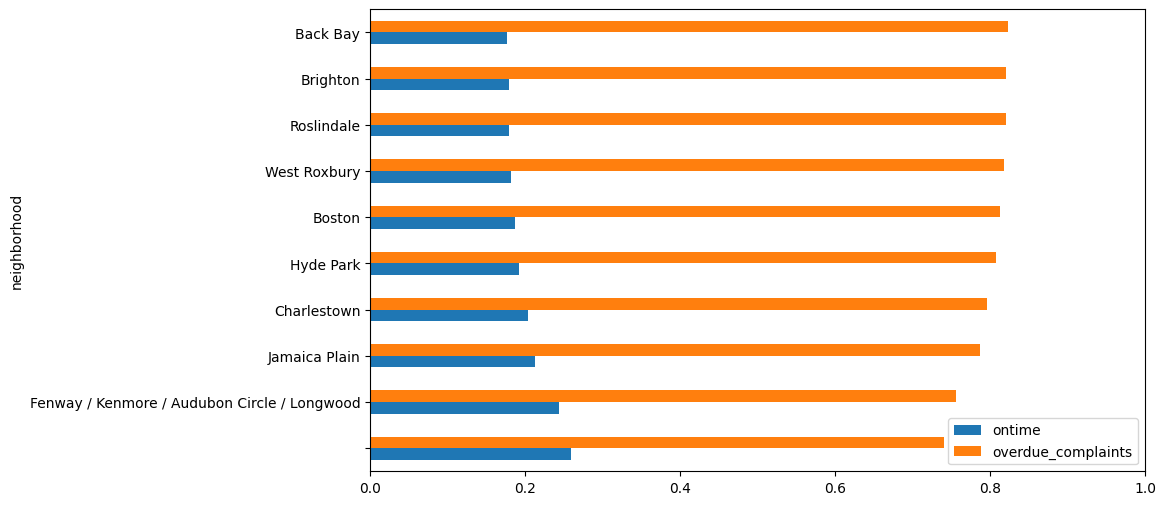

In [3]:
df_prop = df_comp.groupby('neighborhood')['ontime'].value_counts(normalize=True).loc[:,'OVERDUE'].sort_values(ascending=False).head(10).to_frame()
df_prop['overdue_complaints'] = 1-df_prop['ontime']
df_prop.plot(kind='barh', figsize=(10,6), xlim=(0,1))

<AxesSubplot: ylabel='neighborhood'>

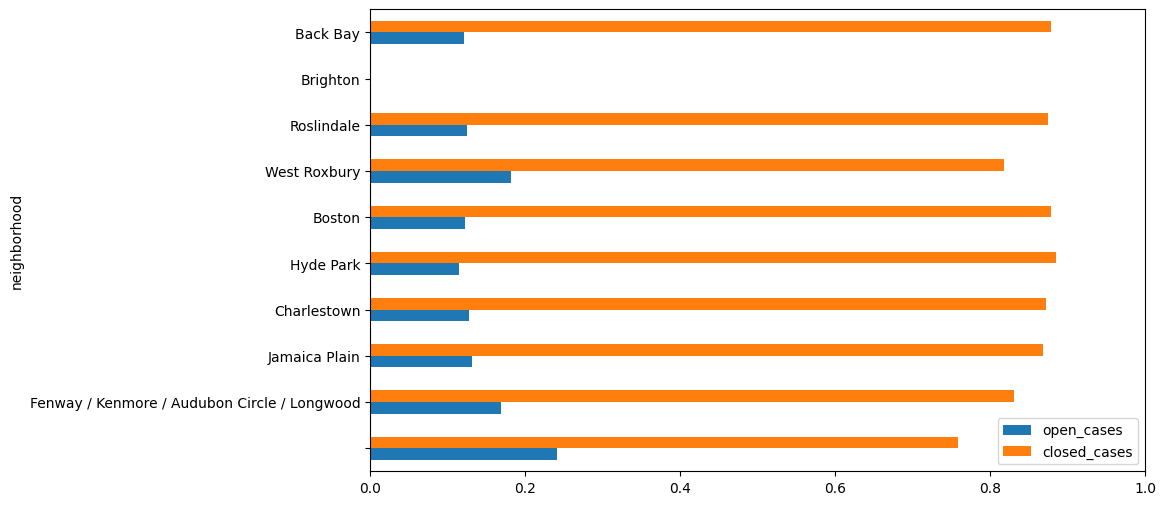

In [4]:
df_prop['open_cases'] = df_comp.groupby('neighborhood')['case_status'].value_counts(normalize=True).loc[:,'Open'].sort_values(ascending=False).head(10).to_frame()
df_prop['closed_cases'] = 1 - df_prop['open_cases']
#plot the open and closes cases columns
df_prop[['open_cases', 'closed_cases']].plot(kind='barh', figsize=(10,6), xlim=(0,1))

In [5]:
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)


#find the latitude and longirtude of each neighborhood and add it to the df_prop dataframe
df_comp.dropna(subset=['latitude', 'longitude'], inplace=True)
df_prop['lat'] = df_comp.groupby('neighborhood')['latitude'].mean().sort_values(ascending=False).to_frame()
df_prop['long'] = df_comp.groupby('neighborhood')['longitude'].mean().sort_values(ascending=False).to_frame()

#plot the map, make the size of the marker proportional to the number of open complaints
for i in range(0,len(df_prop)):
    folium.CircleMarker(location=[df_prop.iloc[i]['lat'], df_prop.iloc[i]['long']],
                        radius=df_prop.iloc[i]['open_cases']*100,
                        color='crimson',
                        fill=True,
                        fill_color='crimson'
                       ).add_to(m)
m

In [6]:
for i in range(0,len(df_prop)):
    folium.CircleMarker(location=[df_prop.iloc[i]['lat'], df_prop.iloc[i]['long']],
                        radius=df_prop.iloc[i]['overdue_complaints']*50,
                        color='green',
                        fill=True,
                        fill_color='green'
                       ).add_to(m)
m

In [7]:
df_violations = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/800a2663-1d6a-46e7-9356-bedb70f5332c.csv')
df_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25556 entries, 0 to 25555
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_dttm       25556 non-null  object 
 1   status            25556 non-null  object 
 2   code              25556 non-null  object 
 3   value             0 non-null      float64
 4   description       25334 non-null  object 
 5   violation_stno    25556 non-null  object 
 6   violation_sthigh  5074 non-null   object 
 7   violation_street  25556 non-null  object 
 8   violation_suffix  25365 non-null  object 
 9   violation_city    25555 non-null  object 
 10  violation_state   25556 non-null  object 
 11  violation_zip     25548 non-null  object 
 12  ward              25556 non-null  object 
 13  contact_addr1     25501 non-null  object 
 14  contact_addr2     4500 non-null   object 
 15  contact_city      25513 non-null  object 
 16  contact_state     25509 non-null  object

<AxesSubplot: >

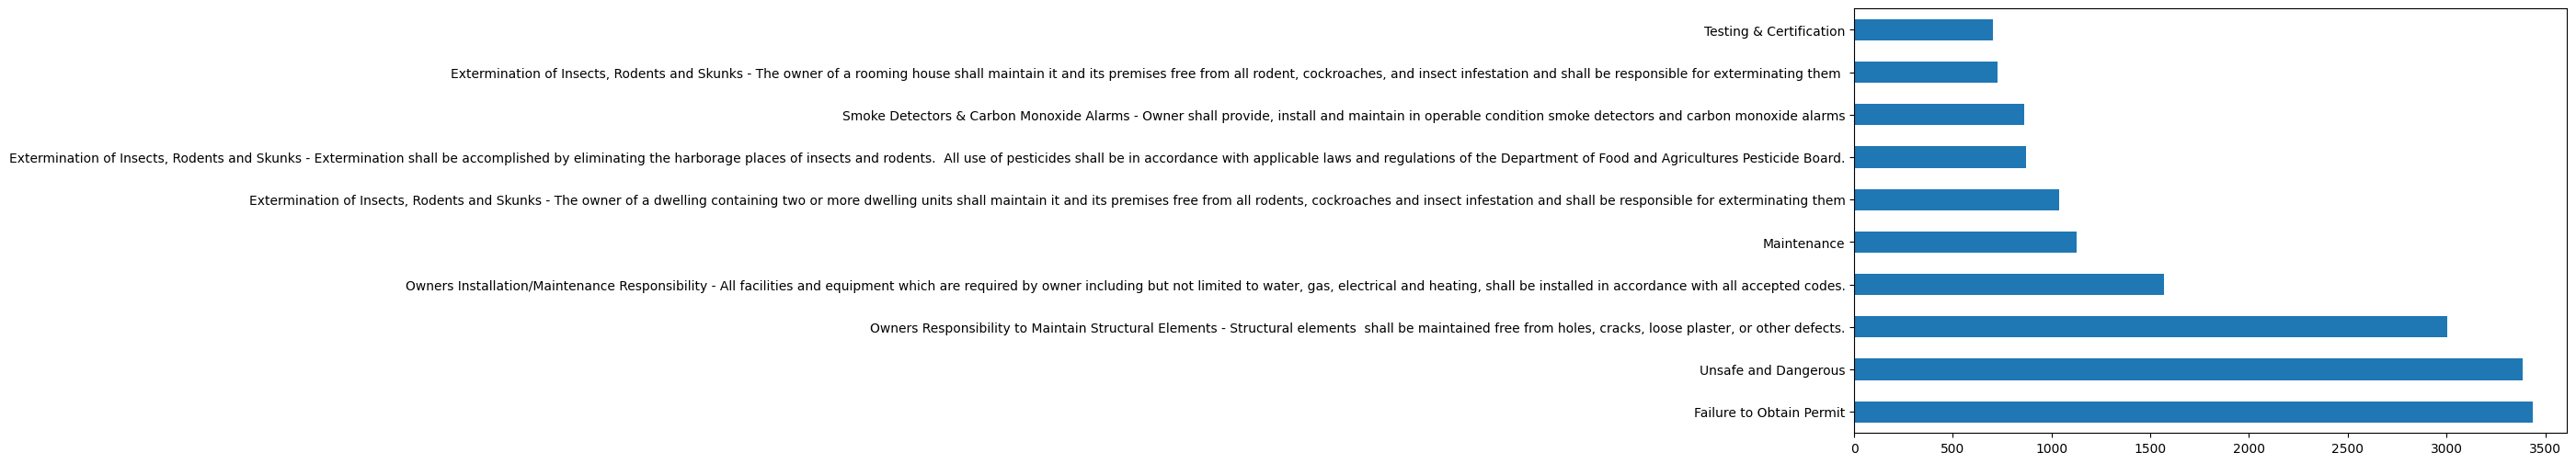

In [8]:
#print the top 10 most common descriptions of violations
df_violations['description'].value_counts().head(10)
#plot the top 10 most common descriptions of violations
df_violations['description'].value_counts().head(10).plot(kind='barh', figsize=(10,6))


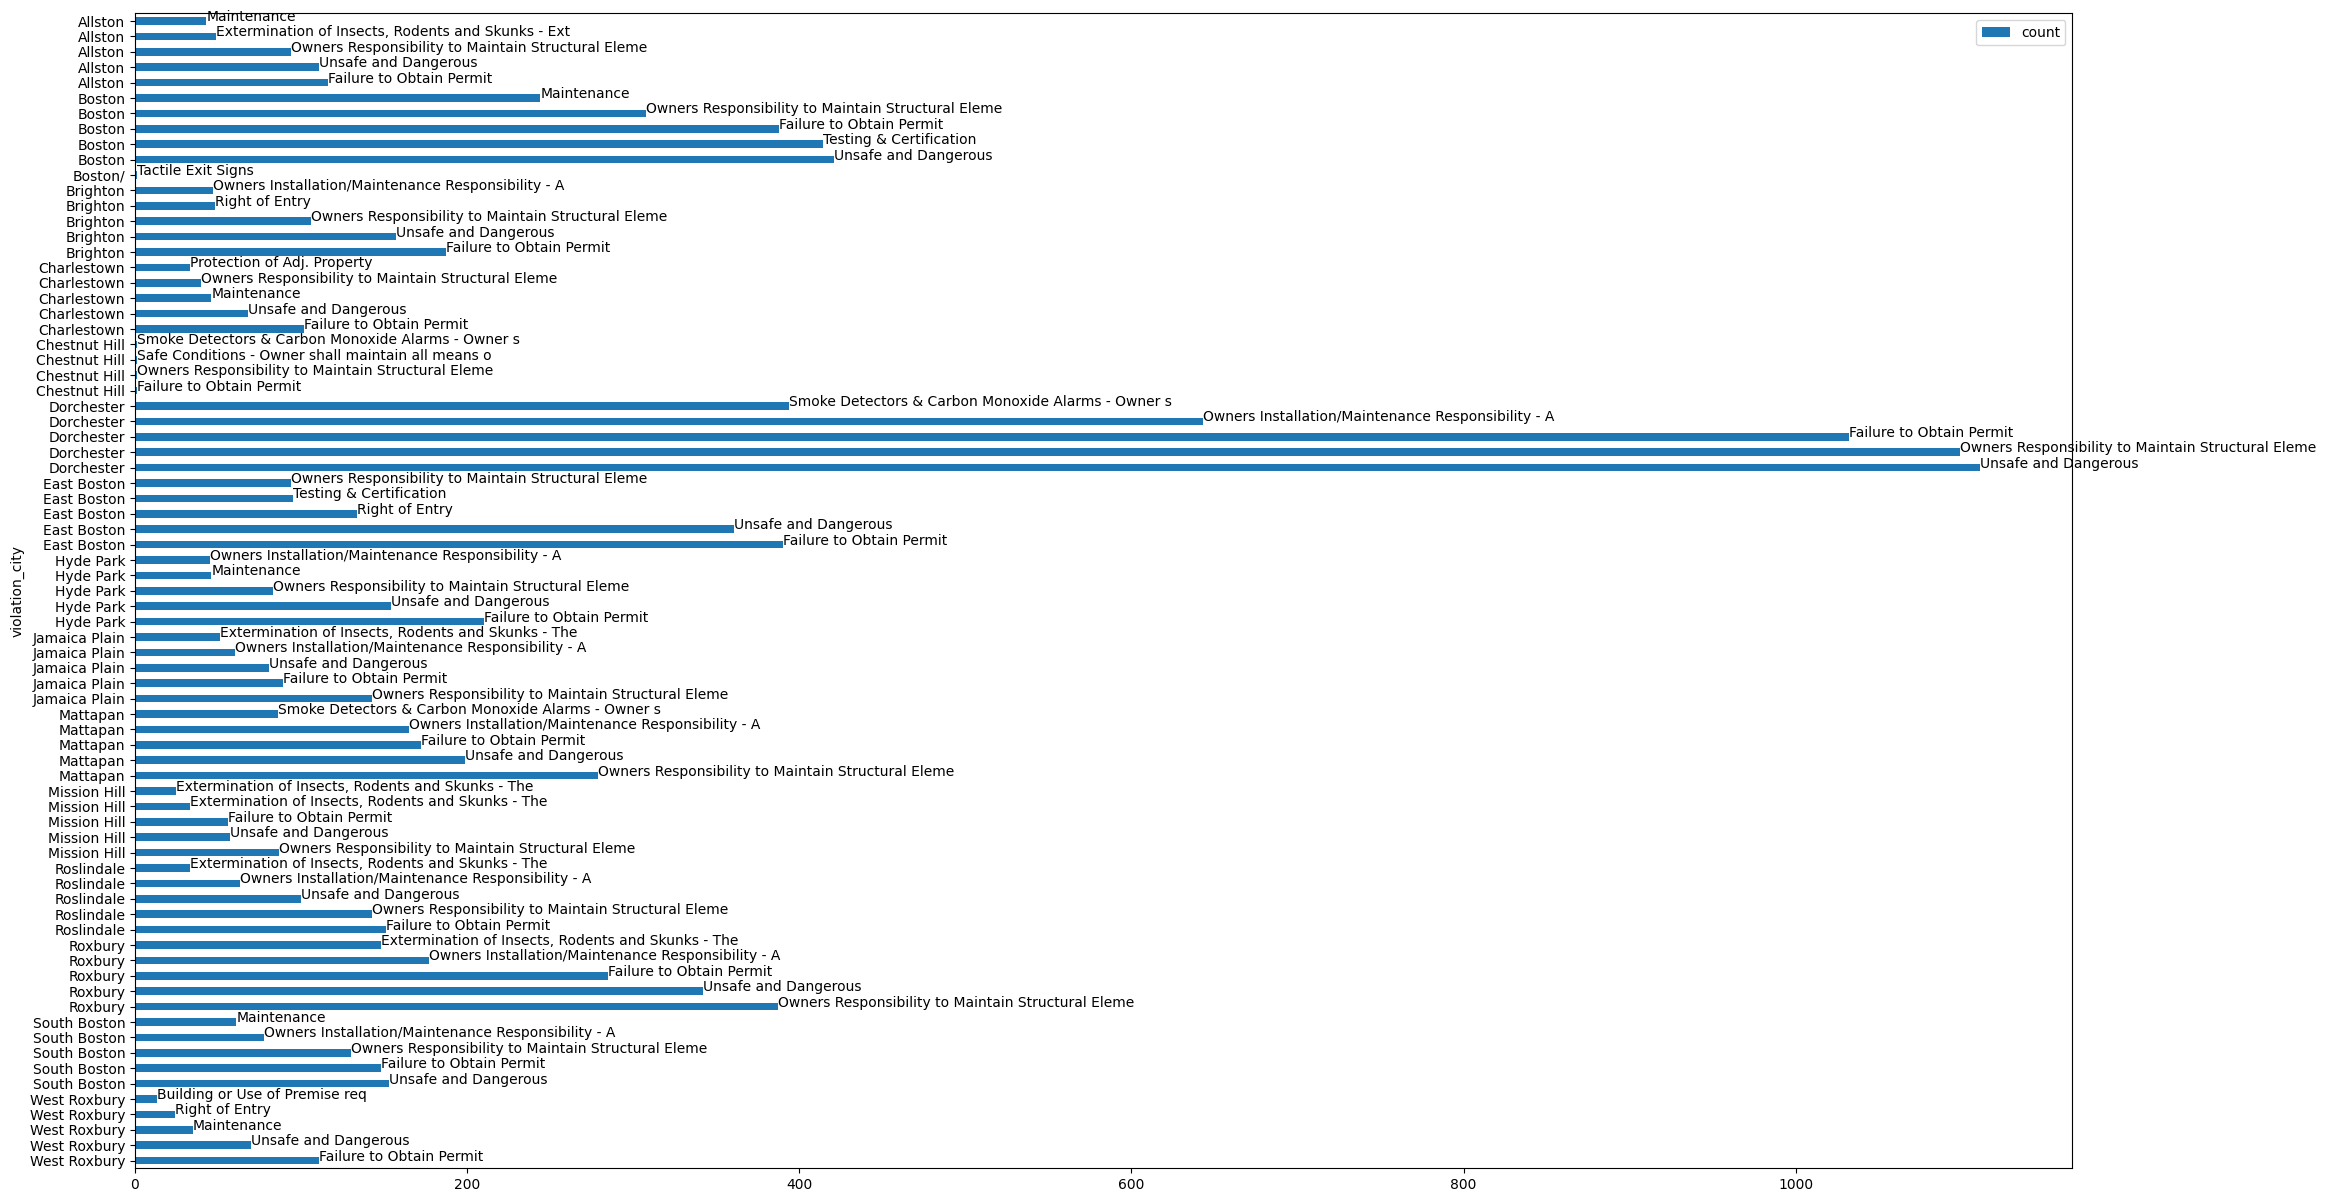

In [44]:
#plot the top 10 most common descriptions of violations in each neighborhood, use violation_city
df_vio_neigh = df_violations.groupby('violation_city')['description'].value_counts().to_frame()
df_vio_neigh.columns = ['count']
df_vio_neigh = df_vio_neigh.reset_index()
df_vio_neigh = df_vio_neigh.sort_values(by=['violation_city', 'count'], ascending=False)
df_vio_neigh = df_vio_neigh.groupby('violation_city').head(5)
df_vio_neigh = df_vio_neigh.set_index('violation_city')
# df_vio_neigh = df_vio_neigh.pivot(columns='description', values='count')
#Restrict the desciption column to 50 characters
df_vio_neigh['description'] = df_vio_neigh['description'].str[:50]
# df_vio_neigh = df_vio_neigh.pivot(columns='description', values='count')
df_vio_neigh.plot(kind='barh', figsize=(25,15))
#Add description as labels to the bars
for i in range(0,len(df_vio_neigh)):
    plt.text(x = df_vio_neigh.iloc[i]['count'] , y = i , s = df_vio_neigh.iloc[i]['description'] , size = 10)
plt.show()


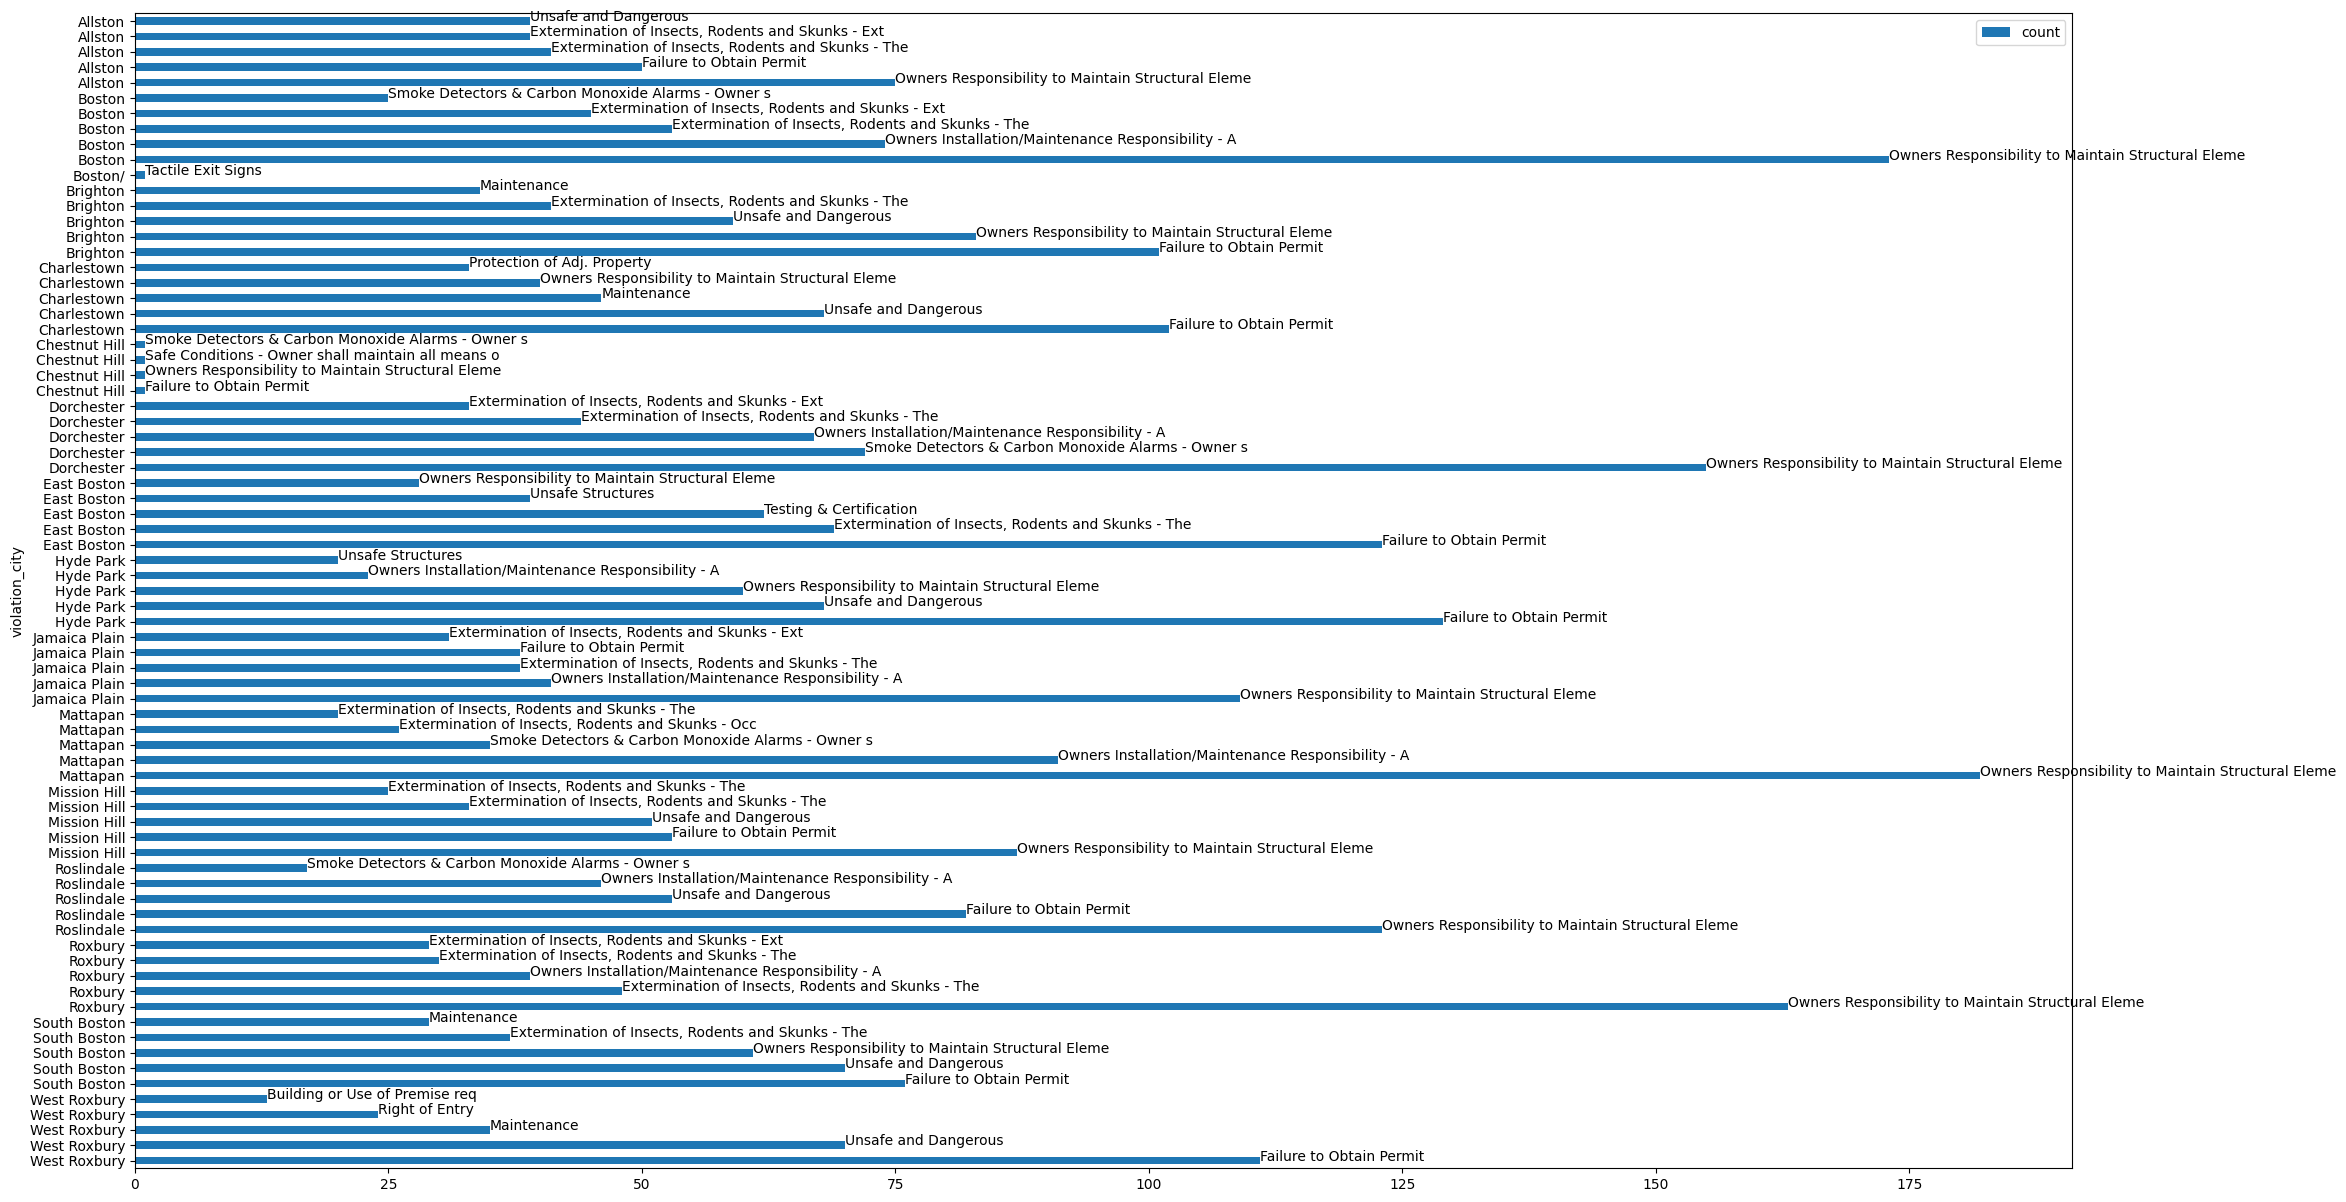

In [47]:
df_violations['violation_city'].value_counts()

#keep only 500 rows for each neighborhood
df_violations = df_violations.groupby('violation_city').head(500)
df_violations['violation_city'].value_counts()
df_vio_neigh = df_violations.groupby('violation_city')['description'].value_counts().to_frame()
df_vio_neigh.columns = ['count']
df_vio_neigh = df_vio_neigh.reset_index()
df_vio_neigh = df_vio_neigh.sort_values(by=['violation_city', 'count'], ascending=False)
df_vio_neigh = df_vio_neigh.groupby('violation_city').head(5)
df_vio_neigh = df_vio_neigh.set_index('violation_city')
# df_vio_neigh = df_vio_neigh.pivot(columns='description', values='count')
#Restrict the desciption column to 50 characters
df_vio_neigh['description'] = df_vio_neigh['description'].str[:50]
# df_vio_neigh = df_vio_neigh.pivot(columns='description', values='count')
df_vio_neigh.plot(kind='barh', figsize=(25,15))
#Add description as labels to the bars
for i in range(0,len(df_vio_neigh)):
    plt.text(x = df_vio_neigh.iloc[i]['count'] , y = i , s = df_vio_neigh.iloc[i]['description'] , size = 10)
plt.show()

In [10]:
from folium.plugins import HeatMap
#plot the heatmap on map, use the latitude and longitude columns
HeatMap(data=df_violations[['latitude', 'longitude']], radius=15).add_to(m)
m


In [11]:
assessor_df = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/income-restricted-inventory-2021.csv')
assessor_df.head()

,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [12]:
#sum all the units in each neighborhood
units_df = assessor_df.groupby('Neighborhood')['RentUnits'].sum().to_frame()

units_df.head()

,RentUnits
Neighborhood,
Allston,1752
Back Bay,1181
Bay Village,41
Beacon Hill,393
Brighton,4468


In [13]:
evictions_df = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/Eviction_Filings_Boston_Neighborhood_Data.csv')
evictions_df

,Neighborhood,Annual Eviction Filing Rate,Annual Market-Rate Housing Eviction Filing Rate,"% of Total Eviction Filings, as Fraction of Boston Total","% Rental Units, as Fraction of Boston Total","% of Market-Rate Eviction Filings, as Fraction of Boston Total","% Market-Rate Rental Units, as Fraction of Boston Total",% Households With Rent Burden,Median Household Income,% White,% Black,% Hispanic/Latinx,% Asian,% Other
0,Boston (Total),2.9,1.0,100.0,100.0,100.0,100.0,49.4,64264,44.9,22.7,19.3,9.4,3.1
1,Allston/Brighton,1.0,0.4,5.3,14.1,6.9,16.3,50.1,61011,62.1,4.9,11.6,17.5,3.6
2,Back Bay/Beacon Hill,0.9,0.5,1.7,5.1,3.0,6.3,39.1,106311,81.1,2.5,6.9,7.5,1.9
3,Central,0.9,0.6,3.0,8.7,5.1,9.6,44.5,88580,67.7,3.1,7.0,19.4,2.5
4,Charlestown,2.1,0.6,2.1,2.7,1.1,2.1,36.6,99287,73.2,5.8,11.8,7.2,1.7
5,Dorchester,3.6,1.6,16.0,11.7,19.9,13.2,55.5,57536,27.9,38.2,15.4,12.1,5.8
6,East Boston,1.3,0.6,3.2,6.3,3.7,6.9,49.6,51808,30.9,2.7,58.9,3.8,3.2
7,Fenway/Kenmore,1.1,0.6,3.5,8.1,5.3,9.5,54.3,35910,61.3,4.9,11.6,18.8,3.1
8,Hyde Park,3.8,2.6,3.8,2.6,5.9,2.4,49.9,71861,24.5,45.5,24.9,1.8,2.6
9,Jamaica Plain,1.9,0.6,4.8,6.8,3.2,6.1,48.4,67203,53.4,11.4,21.4,10.7,2.6


In [14]:
from fuzzywuzzy import fuzz
#find out the number of complaints in each neighborhood, name the coumn as 'complaints'
evictions_v_complaints = df_comp['neighborhood'].value_counts().to_frame().reset_index()
evictions_v_complaints.rename(columns={'index':'neighborhood', 'neighborhood':'complaints'}, inplace=True)


#Use regex to find the number of evictions in each neighborhood (merge columns with greater than 30% match in the name)
def merge_eviction_rate(row):
    for i in range(0, len(evictions_df)):
        if fuzz.ratio(row['neighborhood'], evictions_df.iloc[i]['Neighborhood']) > 40:
            return evictions_df.iloc[i]['Annual Eviction Filing Rate']
evictions_v_complaints['eviction_rate'] = evictions_v_complaints.apply(merge_eviction_rate, axis=1)
evictions_v_complaints


/Users/abhishektiwari/Desktop/sem2/college_env/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,neighborhood,complaints,eviction_rate
0,Dorchester,39209,3.6
1,Roxbury,23541,6.7
2,South Boston / South Boston Waterfront,23264,1.2
3,East Boston,19151,2.9
4,Allston / Brighton,19090,1.0
5,South End,18860,1.2
6,Downtown / Financial District,16496,NaN
7,Jamaica Plain,16051,1.9
8,Back Bay,13850,0.9
9,Greater Mattapan,10873,6.8


In [15]:
#Add number of open complaints to the dataframe
open_temp = df_comp.groupby('neighborhood')['case_status'].value_counts(normalize=True).loc[:,'Open'].sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'neighborhood', 'case_status':'open_complaints'})
evictions_v_complaints = pd.merge(evictions_v_complaints, open_temp, on='neighborhood', how='left')
evictions_v_complaints


,neighborhood,complaints,eviction_rate,open_complaints
0,Dorchester,39209,3.6,0.090515
1,Roxbury,23541,6.7,0.092265
2,South Boston / South Boston Waterfront,23264,1.2,0.083176
3,East Boston,19151,2.9,0.065688
4,Allston / Brighton,19090,1.0,0.084180
5,South End,18860,1.2,0.094327
6,Downtown / Financial District,16496,NaN,0.110572
7,Jamaica Plain,16051,1.9,0.132079
8,Back Bay,13850,0.9,0.121733
9,Greater Mattapan,10873,6.8,0.114688


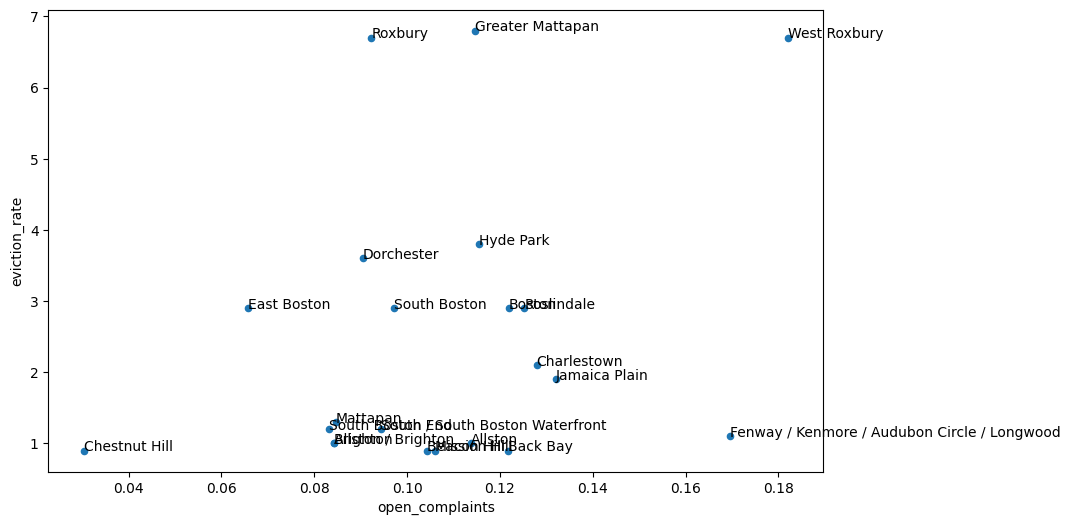

In [16]:
#plot open complaints vs eviction rate
evictions_v_complaints.plot(kind='scatter', x='open_complaints', y='eviction_rate', figsize=(10,6))
#label the points
for i in range(0, len(evictions_v_complaints)):
    plt.annotate(evictions_v_complaints.iloc[i]['neighborhood'], (evictions_v_complaints.iloc[i]['open_complaints'], evictions_v_complaints.iloc[i]['eviction_rate']))
plt.show()
